# Machine Learning Project

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dotenv import load_dotenv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load environment variables from .env file
load_dotenv()

# Access environment variables
dataset=os.environ.get('ml_1_dataset')

In [3]:
print(type(dataset))

<class 'str'>


In [4]:
df = pd.read_csv(dataset)

In [5]:
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


## Data separation as x(features) & y(label)

In [7]:
y = df['logS']

In [8]:
x = df.drop('logS', axis=1)

## Data splitting

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [10]:
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 275 to 109
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             915 non-null    float64
 1   MolWt               915 non-null    float64
 2   NumRotatableBonds   915 non-null    float64
 3   AromaticProportion  915 non-null    float64
dtypes: float64(4)
memory usage: 35.7 KB
None


In [11]:
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 738 to 1000
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             229 non-null    float64
 1   MolWt               229 non-null    float64
 2   NumRotatableBonds   229 non-null    float64
 3   AromaticProportion  229 non-null    float64
dtypes: float64(4)
memory usage: 8.9 KB
None


## Linear Regression

### Train Model

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Apply Model

In [13]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

### Evaluate Model Performance

In [14]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [15]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2']
print(lr_results)

              Method Train MSE  Test MSE  Train R2   Test R2
0  Linear Regression    1.0213  0.968745  0.778222  0.725713


## Random Forest

### Train Model

In [16]:
rf = RandomForestRegressor(max_depth=2, random_state=50)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=50)

### Apply Model

In [17]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluate Model Performance

In [18]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [19]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_test_mse, rf_train_r2, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Train MSE', 'Test MSE', 'Train R2', 'Test R2']
print(rf_results)

          Method Train MSE  Test MSE  Train R2  Test R2
0  Random Forest  1.088991  1.027562  0.763523  0.70906


## Model Comparison

In [20]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
print(df_models)

              Method Train MSE  Test MSE  Train R2   Test R2
0  Linear Regression    1.0213  0.968745  0.778222  0.725713
1      Random Forest  1.088991  1.027562  0.763523   0.70906


### Visualise Comparison

<function matplotlib.pyplot.show(close=None, block=None)>

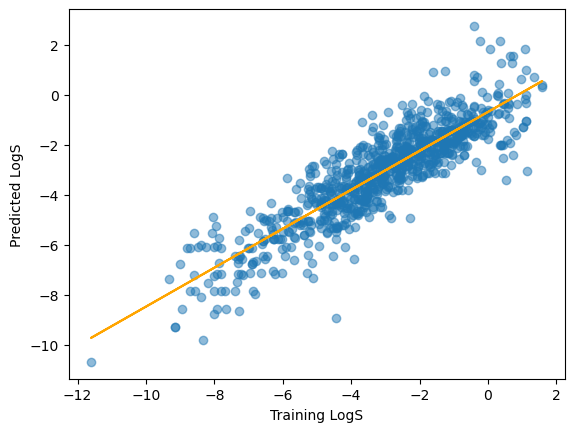

In [21]:
# Linear Regression
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.5)
plt.xlabel('Training LogS')
plt.ylabel('Predicted LogS')

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'Orange')

plt.show